# ["Наивный" Байесовский метод - Naive Bayes](https://ru.wikipedia.org/wiki/%D0%9D%D0%B0%D0%B8%D0%B2%D0%BD%D1%8B%D0%B9_%D0%B1%D0%B0%D0%B9%D0%B5%D1%81%D0%BE%D0%B2%D1%81%D0%BA%D0%B8%D0%B9_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%82%D0%BE%D1%80)

Данный метод используется в основном для решения задачи классификации.

Существуют попытки использовать данный метод для регресии, например [Bayesian Ridge Regression](https://scikit-learn.org/stable/modules/linear_model.html#bayesian-ridge-regression) но такие методы используются нечасто.

Байесовские методы названы в честь английского священника и математика [Томаса Байеса.](https://ru.wikipedia.org/wiki/%D0%91%D0%B0%D0%B9%D0%B5%D1%81,_%D0%A2%D0%BE%D0%BC%D0%B0%D1%81)

Изложение теоретической части основано на курсе лекций Л.М.Местецкого “Математические методы распознавания образов”. Оставлены исходные буквенные обозначения, используемые в курсе лекций.

## Математические основы Байесовского подхода

Байесовский подход исходит из статистической природы наблюдений. За основу  берется предположение о существовании вероятностной меры в пространстве признаков, которая либо известна, либо может быть оценена. Цель состоит в разработке такого классификатора, который будет правильно определять наиболее вероятный класс для пробного образа. Тогда задача состоит в определении “наиболее вероятного” класса.

Пусть задано $M$ классов $ \Omega_1, \Omega_2, \dots , \Omega_M $, а также $P(\Omega_i | x), i = 1,2, \dots , M$ – вероятность того, что
неизвестный объект (в более ранних книгах вместо термина "объект" можно встретить термин "образ"), представляемый вектором признаков $x$, принадлежит классу $ \Omega_i $ (в большинстве источников метки классов принято обозначать не через $ \Omega_i $ а через $ y_i $ ). 

$P(\Omega_i | x)$ называется **апостериорной вероятностью**, поскольку задает распределение индекса класса после эксперимента (a posteriori – т.е. после того, как значение вектора признаков $x$ было получено).

Рассмотрим случай двух классов $\Omega_1$ и $\Omega_2$. Естественно выбрать решающее правило таким образом: объект относим к тому классу, для которого апостериорная вероятность выше. Такое правило классификации по максимуму апостериорной вероятности называется Байесовским: если $ P(\Omega_1 | x) > P(\Omega_2 | x) $, то $x$ классифицируется в $\Omega_1$, иначе в $\Omega_2$. Таким образом, для Байесовского решающего правила необходимо получить апостериорные вероятности $P(\Omega_i | x), i = 1,2.$  Это можно сделать с помощью формулы Байеса.

**Формула Байеса**, полученная Т. Байесом в 1763 году, позволяет вычислить апостериорные вероятности событий через априорные вероятности и функции правдоподобия.

Пусть $ A_1, A_2, \dots, A_n $ – полная группа несовместных событий. 
$\bigcup\limits_{i=1}^{n} A_i = \Omega . A_i \cap A_j = \emptyset $, при $i \ne j$. Тогда апостериорная вероятность имеет вид:

$$ P(A_i | B) = \frac{P(A_i) P(B|A_i)}{\sum\limits_{i=1}^{n} P(A_i) P(B|A_i)} $$

где $P(A_i)$ – априорная вероятность события $A_i$, $P(B|A_i)$ – условная вероятность события $B$ при условии, что произошло событие $A_i$.

Рассмотрим получение апостериорной вероятности $P(\Omega | x)$, зная $P(\Omega)$ и $P(x | \Omega)$.

$$ P(AB) = P(A|B)P(B), P(AB) = P(B|A)P(A)  $$

$$ P(A|B)P(B) = P(B|A)P(A) $$

$$ P(B|A) = \frac{P(A|B)P(B)}{P(A)} $$

Если $P(A)$ и $P(A|B)$ описываются плотностями $p(x)$ и $p(x|B)$, то

$$ P(B|x) = \frac{p(x|B)P(B)}{p(x)} \Rightarrow P(\Omega_i|x) = \frac{p(x|\Omega_i)P(\Omega_i)}{p(x)} $$

При проверке классификации сравнение $P(\Omega_1 | x)$ и $P(\Omega_2 | x)$
 эквивалентно сравнению $p(x|\Omega_1)P(\Omega_1)$ и $p(x|\Omega_2)P(\Omega_2)$. В случае, когда $P(\Omega_1 | x) = P(\Omega_2 | x)$, считается, что мера множества $x$ равна нулю.

Таким образом, задача сравнения по апостериорной вероятности сводится к вычислению величин
$ P(\Omega_1), P(\Omega_2), p(x|\Omega_1), p(x|\Omega_2)$. 
Будем считать, что у нас достаточно данных для определения вероятности принадлежности объекта каждому из классов $P(\Omega_i), i = 1,2.$ Такие
вероятности называются **априорными** вероятностями классов. А также будем считать, что известны функции распределения вектора признаков для каждого класса $P(x | \Omega_i), i = 1,2.$
Они называются функциями правдоподобия $x$ по отношению к $\Omega_i$. Если априорные вероятности и функции правдоподобия неизвестны, то их можно оценить методами математической статистики на множестве прецедентов. Например, $P(\Omega_i) \approx \frac{N_i}{N}$, где $N_i$ – число прецедентов из $\Omega_i, i = 1,2$; $N$ – общее число прецедентов. 
$P(x | \Omega_i)$ может быть приближено гистограммой распределения вектора  признаков для прецедентов из класса $\Omega_i$.

Итак, Байесовский подход к статистическим задачам основывается на предположении о существовании некоторого распределения вероятностей для каждого параметра. Недостатком этого метода является необходимость постулирования как существования априорного распределения для неизвестного параметра, так и знание его формы.

## Ошибка классификации

#### Определение.
Вероятность 
$ P_e = P(x \in R_2, \Omega_1) + P(x \in R_1, \Omega_2) $
 называется ошибкой классификации, 
$ R_1 = \{x: P(\Omega_1)p(x|\Omega_1) > P(\Omega_2)p(x|\Omega_2) \} $,
$ R_2 = \{x: P(\Omega_1)p(x|\Omega_1) < P(\Omega_2)p(x|\Omega_2) \} $
– области решения, при этом $ \Omega_1 \cap \Omega_2 = \emptyset $.

#### Теорема. 
**Байесовский классификатор является оптимальным по отношению к минимизации вероятности ошибки классификации.**

#### Доказательство. 

Рассмотрим ошибку классификации:

$$ P_e = P(x \in R_2, \Omega_1) + P(x \in R_1, \Omega_2) = $$

$$ = P(\Omega_1) \int\limits_{R_2}  p(x|\Omega_1)dx + P(\Omega_2) \int\limits_{R_1} p(x|\Omega_2)dx = $$

$$ = P(\Omega_1) \Big( 1 - \int\limits_{R_1}  p(x|\Omega_1)dx \Big) + P(\Omega_2) \int\limits_{R_1} p(x|\Omega_2)dx = $$

$$ = P(\Omega_1) - P(\Omega_1) \int\limits_{R_1}  p(x|\Omega_1)dx + P(\Omega_2) \int\limits_{R_1} p(x|\Omega_2)dx = $$

Учитывая формулу Байеса: 
$ P(x|\Omega_i) = \frac{P(\Omega_i|x)p(x)}{P(\Omega_i)}, i = 1,2$ получим: 

$$ = P(\Omega_1) - P(\Omega_1) \int\limits_{R_1} \frac{P(\Omega_1|x)p(x)}{P(\Omega_1)}dx + P(\Omega_2) \int\limits_{R_1} \frac{P(\Omega_2|x)p(x)}{P(\Omega_2)}dx = $$

$$ = P(\Omega_1) - \int\limits_{R_1} P(\Omega_1|x)p(x)dx +  \int\limits_{R_1} P(\Omega_2|x)p(x)dx = $$

$$ = P(\Omega_1) - \int\limits_{R_1} p(x) \Big( P(\Omega_1|x) - P(\Omega_2|x) \Big)dx $$

Таким образом, минимум достигается, когда 
$ R_1 = \{x: P(\Omega_1|x) > P(\Omega_2|x) \} $.
$R_2$ выбирается из остальных точек.




Данная теорема была доказана для двух классов $\Omega_1$ и $\Omega_2$. Обобщим ее на $M$ классов.

Пусть вектор признаков $x$ относится к классу $\Omega_i$, если $P(\Omega_i|x) > P(\Omega_j|x)$, при $i \ne j$,
$i = 1,2, \dots, M; j = 1,2, \dots, M$. 

Соответственно необходимо доказать, что данное правило
минимизирует вероятность ошибки классификации. Для доказательства следует воспользоваться формулой правильной классификации $ P_r = 1 - P_e $.

#### Доказательство. 

Воспользуемся формулой правильной классификации $ P_r = 1 - P_e $.

$$ P_r = P(x \in R_1, \Omega_1) + P(x \in R_2, \Omega_2) + \dots + P(x \in R_l, \Omega_l) = $$

$$ = \sum\limits_{i=1}^{l} P(x \in R_i | \Omega_i)P(\Omega_i) = $$

$$ = \sum\limits_{i=1}^{l} P(\Omega_i) \int\limits_{R_i} p(x | \Omega_i)dx = $$

$$ = P(\Omega_1) \Bigg( 1 - \sum\limits_{i=2}^{l} \int\limits_{R_i} p(x | \Omega_1)dx  \Bigg) + \sum\limits_{i=2}^{l} P(\Omega_i) \int\limits_{R_i}   p(x | \Omega_i)dx = $$

$$ = P(\Omega_1) - \sum\limits_{i=2}^{l} \Bigg( P(\Omega_1) \int\limits_{R_i} p(x | \Omega_1)dx - P(\Omega_i) \int\limits_{R_i} p(x | \Omega_i)dx \Bigg) = $$ 

Учитывая формулу Байеса: 
$ P(x|\Omega_i) = \frac{P(\Omega_i|x)p(x)}{P(\Omega_i)}, i = 1,2, \dots, l$ получим: 

$$ = P(\Omega_1) - \sum\limits_{i=2}^{l} \Bigg( P(\Omega_1) \int\limits_{R_i} \frac{P(\Omega_1|x)p(x)}{P(\Omega_1)}dx - P(\Omega_i) \int\limits_{R_i} \frac{P(\Omega_i|x)p(x)}{P(\Omega_i)}dx \Bigg) = $$ 

$$ = P(\Omega_1) - \sum\limits_{i=2}^{l} \Bigg( \int\limits_{R_i} P(\Omega_1|x)p(x)dx - \int\limits_{R_i} P(\Omega_i|x)p(x)dx \Bigg) = $$ 

$$ = P(\Omega_1) - \sum\limits_{i=2}^{l} \int\limits_{R_i} p(x) \Bigg( P(\Omega_1|x) - P(\Omega_i|x) \Bigg)dx $$

Таким образом, максимум достигается, когда 
$ P(\Omega_1|x) < P(\Omega_i|x)$.
Аналогично для всех $j = 1,2, \dots, l$ максимум достигается, когда
$ R_i = \{x: P(\Omega_j|x) < P(\Omega_i|x) \} $.



## Минимизация среднего риска

Вероятность ошибки классификации – не всегда лучший критерий проверки классификатора. В том случае, когда цена ошибок различного типа существенно различается, лучше использовать другой критерий качества классификации – **минимум среднего риска**.

Рассмотрим задачу классификации по $M$ классам. $R_j, j = 1,2, \dots, M$ – области предпочтения классов $\Omega_j$. Предположим, что вектор $x$ из класса $\Omega_k$ лежит в $R_i, i \ne k$, т.е. классификация происходит с ошибкой. Свяжем с этой ошибкой штраф $\lambda_{ki}$ называемый
потерями в результате того, что объект из класса $\Omega_k$ был принят за объект из класса $\Omega_i$. Обозначим через $L = \Arrowvert \lambda_{ki} \Arrowvert$ матрицу потерь (которую также называют матрицей штрафов).

#### Определение. 

**Выражение 
$ r_k = \sum\limits_{i=1}^{M} \lambda_{ki} P\{ x \in R_i | \Omega_k \}$ = 
$ \sum\limits_{i=1}^{M} \lambda_{ki} \int\limits_{R_i} p(x | \Omega_k)dx $
называется риском при классификации объекта класса $\Omega_k$.**

#### Определение. 

**Выражение 
$ r = \sum\limits_{i=1}^{M} r_k P(\Omega_k)$
называется общим средним риском.**

Тогда можно поставить задачу о выборе классификатора, минимизирующего этот риск. Преобразуем выражение общего среднего риска:

$$ r = \sum\limits_{i=1}^{M} r_k P(\Omega_k) = \sum\limits_{k=1}^{M} P(\Omega_k) \sum\limits_{i=1}^{M} \lambda_{ki} \int\limits_{R_i} p(x | \Omega_k)dx  $$

$$ = \sum\limits_{i=1}^{M} \Bigg( \sum\limits_{k=1}^{M} P(\Omega_k) \lambda_{ki} \int\limits_{R_i} p(x | \Omega_k)dx \Bigg) = $$

$$ = \sum\limits_{i=1}^{M} \int\limits_{R_i} \Bigg( \sum\limits_{k=1}^{M}  \lambda_{ki} p(x | \Omega_k) P(\Omega_k) \Bigg) dx $$

Из этого выражения видно, что риск минимален, когда каждый из интегралов в данной сумме минимален, т.е. $x \in R_i$, если $l_i < l_j$, при $i \ne j$, где $l_i = \sum\limits_{k=1}^{M} \lambda_{ki} p(x | \Omega_k) P(\Omega_k)$, $l_j = \sum\limits_{k=1}^{M} \lambda_{kj} p(x | \Omega_k) P(\Omega_k)$.



### Пример.
Рассмотрим ситуацию радиолокационной разведки. На экране радара отражаются
не только цели, но и помехи. Такой помехой может служить стая птиц, которую можно принять за небольшой самолет. В данном случае это двухклассовая задача.

Рассмотрим матрицу штрафов: $L = \Arrowvert \lambda_{ki} \Arrowvert, i=1,2; k=1,2$. $\lambda_{ki}$ - это штраф за принятие объекта из класса $k$ за объект класса $i$. Тогда

$$ l_1 = \lambda_{11} p(x | \Omega_1) P(\Omega_1) + \lambda_{21} p(x | \Omega_2) P(\Omega_2) $$
$$ l_2 = \lambda_{12} p(x | \Omega_1) P(\Omega_1) + \lambda_{22} p(x | \Omega_2) P(\Omega_2) $$

Пусть $x$ относится у классу $\Omega_1$, если $l_1 < l_2$ т.е.

$$ \lambda_{11} p(x | \Omega_1) P(\Omega_1) + \lambda_{21} p(x | \Omega_2) P(\Omega_2) < \lambda_{12} p(x | \Omega_1) P(\Omega_1) + \lambda_{22} p(x | \Omega_2) P(\Omega_2) $$

$$ (\lambda_{21} - \lambda_{22}  ) p(x | \Omega_2) P(\Omega_2) < (\lambda_{12} - \lambda_{11}  ) p(x | \Omega_1) P(\Omega_1) $$

Та как $ \lambda_{21} > \lambda_{22}$ и $ \lambda_{12} > \lambda_{11}$, то

$$ \frac{p(x | \Omega_1)}{p(x | \Omega_2)} > \frac{\lambda_{21} - \lambda_{22}}{\lambda_{12} - \lambda_{11}} \cdot \frac{P(\Omega_2)}{P(\Omega_1)} $$

Стоящее в левой части неравенства отношение $ l_{12} = \frac{p(x | \Omega_1)}{p(x | \Omega_2)} $ называется отношением
правдоподобия. Неравенство описывает условие предпочтения класса $\Omega_1$ классу $\Omega_2$.

## Дискриминантные функции и поверхности решения

Минимизация риска и вероятности ошибки эквивалентны разделению пространства признаков на $M$ областей. Если области $R_i$ и $R_j$ смежные, то они разделены поверхностью решения в многомерном пространстве.  Для случая минимизации вероятности ошибки поверхность решения задается уравнением:

$$ P(\Omega_i|x) - P(\Omega_j|x) = 0 $$

В данном уравнении приходится оперировать с вероятностями. Иногда вместо вероятностей удобнее работать с функцией от вероятности:

$$ g_i(x) = f \Big( P(\Omega_i|x) \Big) $$

где функция $f$ монотонно возрастает.

#### Определение.
**Функция $ g_i(x) = f \Big( P(\Omega_i|x) \Big) $ называется дискриминантной функцией.**

Таким образом, поверхность решения будет задаваться уравнением:

$$ g_i(x) - g_j(x) = 0, i=1,2, \dots, M; j=1,2, \dots, M; i \ne j $$

Для задачи классификации по вероятности ошибки или риску не всегда удается вычислить вероятности. В этом случае бывает более предпочтительно вычислить разделяющую поверхность на основе другой функции стоимости. Такие подходы дают решения, субоптимальные по отношению к Байесовской классификации.

## Байесовский классификатор для нормального распределения

Распределение Гаусса очень широко используется по причине вычислительного удобства и адекватности во многих случаях. Рассмотрим многомерную плотность нормального распределения $ N(\mu_i, \Sigma_i)$:

$$ P(x | \Omega_i) = \frac{1}{\sqrt{2 \pi |\Sigma_i|}} \cdot exp \Bigg( - \frac{1}{2} \cdot \frac{(x - \mu_i)^{T}}{\Sigma_i \cdot (x - \mu_i)} \Bigg), i=1,2,\dots, M $$

где:

- $\mu_i = E[X]$ - математическое ожидание случайной величины $x$ в классе   $\Omega_i$;
- $\Sigma_i$ - матрица ковариации размерности $l \times l$ для класса $\Omega_i$;
- $|\Sigma_i|$ - определитель матрицы ковариации;
- $x, \mu_i$ - вектора-столбцы, $x^T, \mu_i^T$ - вектора-строки.

# [Реализация наивного Байесовского классификатора в библиотеке scikit-learn](https://scikit-learn.org/stable/modules/naive_bayes.html)

Данный метод реализован в библиотеке scikit-learn с использованием нескольких классов. В основом они различаются тем, на какое распределение входных данных они рассчитаны.

Поскольку наивный Байесовский классификатор может использоваться на очень больших выборках, которые не помещаются в оперативную память (в частности для классификации текстовых данных), то у рассматриваемых классов кроме метода fit также реализован метод partial_fit, позволяющий поочередно  обучать классификатор на отдельных фрагментах выборки.

In [1]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from IPython.display import Image
from sklearn.datasets import load_iris, load_boston
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
# Используем датасет iris с двумя первыми признаками
iris = load_iris()
iris_X = iris.data[:, :2]
iris_y = iris.target

In [3]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    #Можно проверить все ли метки классов предсказываются
    #print(np.unique(Z))
    out = ax.contourf(xx, yy, Z, **params)
    return out


def plot_cl(clf):
    title = clf.__repr__
    clf.fit(iris_X, iris_y)
    fig, ax = plt.subplots(figsize=(5,5))
    X0, X1 = iris_X[:, 0], iris_X[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=iris_y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    plt.show()

### Gaussian Naive Bayes

В этом случае предполагается что значения анализируемых признаков распределены [нормально.](https://ru.wikipedia.org/wiki/%D0%9D%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5) 

Данный метод реализуется с помощью класса [GaussianNB.](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB)

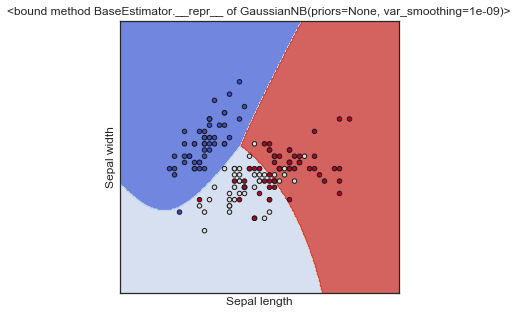

In [4]:
plot_cl(GaussianNB())

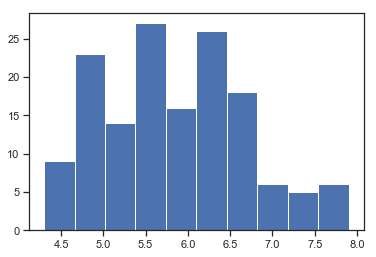

In [5]:
# Проверим как распределены признаки
plt.hist(iris_X[:, 0])
plt.show()

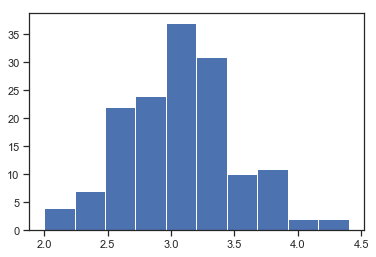

In [6]:
plt.hist(iris_X[:, 1])
plt.show()

Распределение признаков заметно отличается от нормального. Поэтому при классификации заметны ошибки.

Попробуем искусственно сгенерировать признаки на основе нормального распределения.

In [7]:
def test_normal():
    global iris_X
    
    feature_1 = np.random.normal(size=150)
    plt.hist(feature_1)
    plt.show()
    
    feature_2 = np.random.normal(size=150)
    plt.hist(feature_2)
    plt.show()
    
    iris_X1 = np.column_stack((feature_1, feature_2))
    iris_X = iris_X1
    plot_cl(GaussianNB())

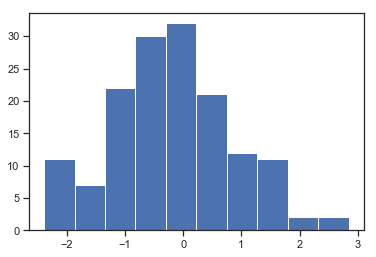

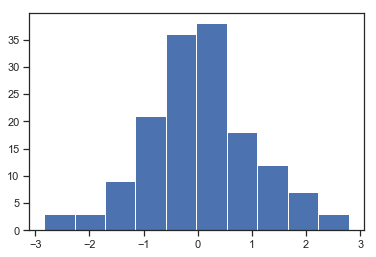

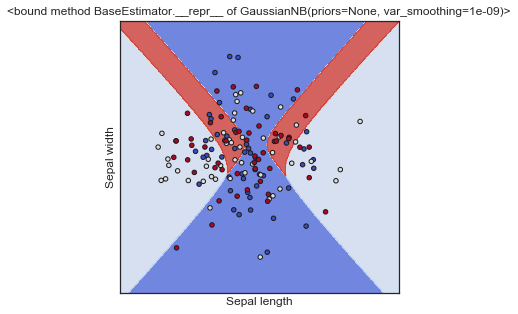

In [8]:
test_normal()

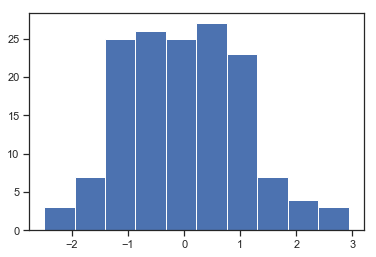

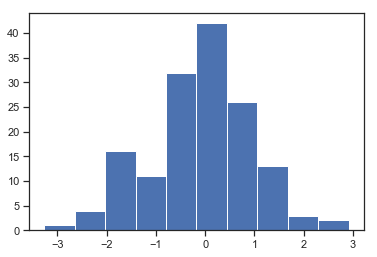

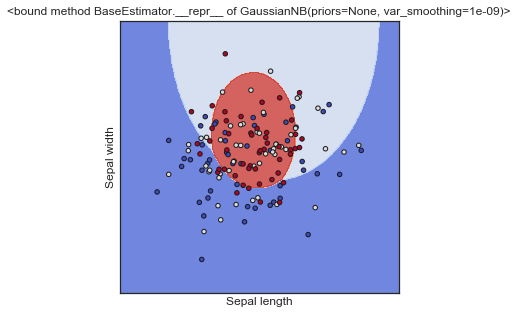

In [9]:
test_normal()

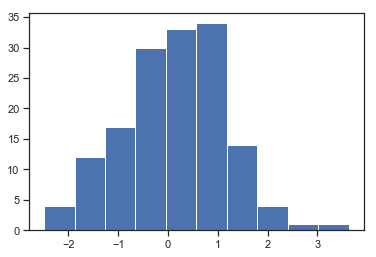

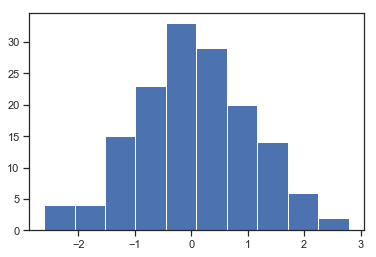

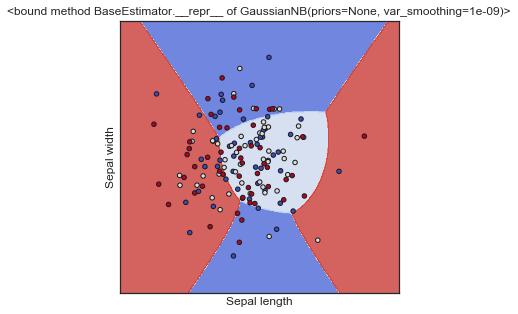

In [10]:
test_normal()

### Multinomial Naive Bayes (MNB)

Данный метод используется в основном для классификации текстов.

Реализует алгоритм "наивного" Байеса для [мультиномиального распределения.](https://ru.wikipedia.org/wiki/%D0%9C%D1%83%D0%BB%D1%8C%D1%82%D0%B8%D0%BD%D0%BE%D0%BC%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5)

Предполагается, что входными данными является результат работы CountVectorizer. Отмечается, что в случае использования TfidfVectorizer метод также работает хорошо.

Распределение параметризуется вектором $ \theta_y = (\theta_{y1}, \dots, \theta_{yn}) $ для каждого класса $y$, где $n$ - количество признаков (для случая классификации текстов это размер словаря); $\theta_{yi}$ - вероятность $P(x_i | y)$ того что признак $i$ присутствует в текущем примере (строке данных), принадлежащем к классу $y$. 

Параметры $ \theta_y $ оцениваются с использованием [аддитивного сглаживания:](https://en.wikipedia.org/wiki/Additive_smoothing)

$$ \hat{\theta}_{yi} = \frac{N_{yi} + \alpha}{N_{y} + \alpha n}  $$

где:

- $ N_{yi} = \sum\limits_{x \in T} x_i $ - количество раз, которое признак $i$ встретился в примерах класса $y$ обучающей выборки $T$;
- $ N_{y} = \sum\limits_{i=1}^{n} N_{yi} $ - суммарное количество всех признаков для класса $y$.

Значение гиперпараметра сглаживания $\alpha \geqslant 0$ позволяет избежать использования нулевых  вероятностей. Вариант сглаживания при $\alpha=1$ называют Лапласовым сглаживанием (Laplace smoothing), а вариант сглаживания при $\alpha<1$ называют сглаживанием Лидстоуна (Lidstone smoothing).

Данный метод реализуется с помощью класса [MultinomialNB.](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB)

### Complement Naive Bayes (CNB)

Является развитием метода Multinomial Naive Bayes (MNB) и особенно хорошо подходит для наборов данных с сильным дисбалансом классов.

CNB использует статистику из дополнения каждого класса для вычисления весов модели. Изобретатели CNB эмпирически показали, что оценки параметров для CNB более стабильны, чем для MNB. Как правило, CNB превосходит MNB (часто со значительным отрывом) в задачах классификации текста. 

Порядок расчета весов выглядит следующим образом:

$$ \hat{\theta}_{ci} = \frac{\alpha_i + \sum\limits_{j:y_j \ne c} d_{ij}}{\alpha + \sum\limits_{j:y_j \ne c} \sum\limits_{k} d_{kj} } $$

$$ w_{ci} = log \big( \hat{\theta}_{ci} \big) $$

$$ w_{ci} = \frac{w_{ci}}{\sum\limits_{j} |w_{ci}|} $$

Суммирование выполняется по всем документам $j$ не входящим в класс $c$. Значение $d_{ij}$ формируется с использованием CountVectorizer или TfidfVectorizer для термина $i$ в документе $j$. $\alpha_i$ - гиперпараметр сглаживания (такой же как и для MNB), $ \alpha = \sum\limits_{i} \alpha_i$.

Для классификации используется следующая формула:

$$ \hat{c} = arg \big(  min_c \sum\limits_{i} t_i w_{ci}  \big) $$  

где $ t = (t_1, \dots , t_n) $ - тестовый документ, $ t_i $ - количество вхождений слова $i$.

Данный метод реализуется с помощью класса [ComplementNB.](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.ComplementNB.html#sklearn.naive_bayes.ComplementNB)

### Bernoulli Naive Bayes

Данный метод реализует алгоритм классификации для данных, к которым применимо многомерное распределение Бернулли. Многомерное распределение означает, что набор данных может содержать несколько признаков, но все они являются двоичными. Таким образом, весь датасет должен состоять из двоичных (бинарных) признаков.

При использовании параметра binarize бинаризация признаков производится в автоматическом режиме. Но данный режим является тривиальным, так как задает только порог для бинаризации.   

Функция плотности вероятности может быть записана следующим образом:

$$ P(x_i | y) = P(i | y)x_i + (1 - P(i | y))(1 - x_i) $$

Если метод Multinomial Naive Bayes просто игнорирует отсутствие признака, то Bernoulli Naive Bayes устанавлиявает явное "пенальти" за отсутствие признака.

Данный метод также можно использовать для классификации текстов. Но в этом случае нужно использовать частный случай CountVectorizer (с параметром binary=True), который не считает количество вхождений слов в текст, а устанавливает 1 в случае наличия слова в тексте или 0 в случае отсутствия слова. Определяется не количество вхождений слов в текст, а факт присутствия слова в тексте, в этом случае все признаки являются бинарными.

Отмечается, что данный метод относительно неплохо работает в случае коротких текстовых документов.

Данный метод реализуется с помощью класса [BernoulliNB.](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB)

### Решение задачи анализа тональности текстов с использованием  Байесовских методов

In [11]:
imdb_df = pd.read_csv("data/imdb_labelled.txt", delimiter='\t', header=None, names=['text', 'value'])
imdb_df.head()

,text,value
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [12]:
X_train, X_test, y_train, y_test = train_test_split(imdb_df['text'], imdb_df['value'], test_size=0.5, random_state=1)

In [13]:
def accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> Dict[int, float]:
    """
    Вычисление метрики accuracy для каждого класса
    y_true - истинные значения классов
    y_pred - предсказанные значения классов
    Возвращает словарь: ключ - метка класса, 
    значение - Accuracy для данного класса
    """
    # Для удобства фильтрации сформируем Pandas DataFrame 
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют 
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        # сохранение результата в словарь
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    """
    Вывод метрики accuracy для каждого класса
    """
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

In [14]:
def sentiment(v, c):
    model = Pipeline(
        [("vectorizer", v), 
         ("classifier", c)])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print_accuracy_score_for_classes(y_test, y_pred)

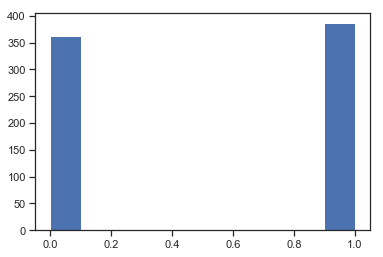

In [15]:
# В целевом признаке распределение классов относительно равномерное
plt.hist(imdb_df['value'])
plt.show()

In [16]:
# Классификация с использованием логистической регресии
sentiment(TfidfVectorizer(), LogisticRegression(C=5.0))

Метка 	 Accuracy
0 	 0.7964071856287425
1 	 0.6859903381642513


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [17]:
sentiment(CountVectorizer(), MultinomialNB())

Метка 	 Accuracy
0 	 0.874251497005988
1 	 0.5217391304347826


In [18]:
sentiment(TfidfVectorizer(), MultinomialNB())

Метка 	 Accuracy
0 	 0.9041916167664671
1 	 0.5603864734299517


In [19]:
sentiment(CountVectorizer(), ComplementNB())

Метка 	 Accuracy
0 	 0.874251497005988
1 	 0.5507246376811594


In [20]:
sentiment(TfidfVectorizer(), ComplementNB())

Метка 	 Accuracy
0 	 0.8622754491017964
1 	 0.6521739130434783


In [21]:
sentiment(CountVectorizer(binary=True), BernoulliNB())

Метка 	 Accuracy
0 	 0.9041916167664671
1 	 0.5362318840579711


Методы классификации текстов, основанные на "наивном" Байесе работают не хуже чем логистическая регрессия.

## Дополнительные источники

- [Описание метода на machinelearning.ru](http://www.machinelearning.ru/wiki/index.php?title=%D0%91%D0%B0%D0%B9%D0%B5%D1%81%D0%BE%D0%B2%D1%81%D0%BA%D0%B8%D0%B9_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%82%D0%BE%D1%80)
- [6 простых шагов для освоения наивного байесовского алгоритма (с примером кода на Python)](http://datareview.info/article/6-prostyih-shagov-dlya-osvoeniya-naivnogo-bayesovskogo-algoritma-s-primerom-koda-na-python/)
- [Naive Bayes Classification With Sklearn](https://blog.sicara.com/naive-bayes-classifier-sklearn-python-example-tips-42d100429e44)
- [Implementing 3 Naive Bayes classifiers in scikit-learn](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/)
